# Classifying labels of unseen data
There are four steps. 
+ First, build a classifier model
+ Model learns from the labeled data we pass to it.
+ Pass unlabeled data to the model as input.
+ Model predicts labels for this unseen data.

## k-Nearest Neighbors
+ Predict the label of a data point by
  - Looking at the k closest labeled data points
  - Taking a majority vote

## Measuring model performance
Accuracy is a commonly used metric in classification. It is the number of correct predictions divided by the total number of observations.

### Train/test split
```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
```
where:<br>
**stratify=y**- Allows equal proportion of data split along y<br>
**random_state=21** - Ensures that the random state generator is reproducible<br>

## Model complexity
In KNeighborsClassifier, decision boundaries are thresholds for determining what label a model assigns to an observation.

In the image shown, as k increases, the decision boundary is less affected by individual observations, reflecting a simpler model. Simpler models are less able to detect relationships in the dataset, which is known as **underfitting**. 

In contrast, complex models can be sensitive to noise in the training data, rather than reflecting general trends. This is known as **overfitting**.

We can also interpret k using a model complexity curve. With a KNN model, we can calculate accuracy on the training and test sets using incremental k values, and plot the results. We create empty dictionaries to store our train and test accuracies, and an array containing a range of k values. We use a for loop to repeat our previous workflow, building several models using a different number of neighbors. We loop through our neighbors array and, inside the loop, we instantiate a KNN model with n_neighbors equal to the neighbor iterator, and fit to the training data. We then calculate training and test set accuracy, storing the results in their respective dictionaries.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [5]:
# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

In [ ]:
X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

In [ ]:
# Create neighbors
neighbors = np.arange(1, 12)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

In [ ]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

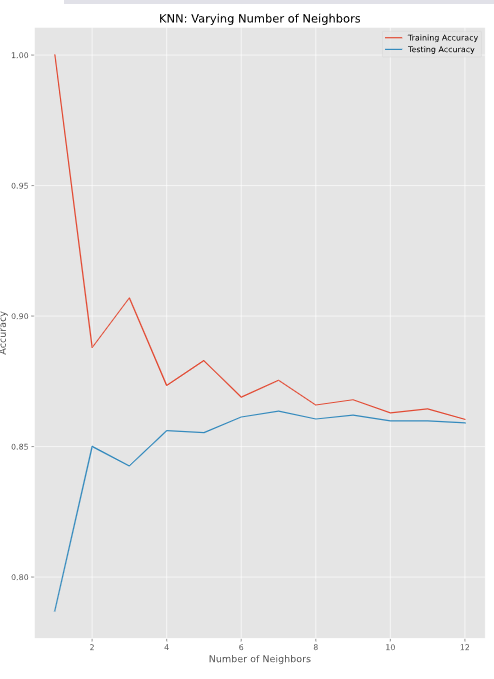